<a href="https://colab.research.google.com/github/TanNicholas80/NLP_Suicide_Detection/blob/main/NLP_Suicide_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
#punya resha
dataset = pd.read_csv("drive/My Drive/Gemastik Datmin/Suicide_Detection.csv", engine='python', encoding='utf-8')

In [ ]:
dataset

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


# Reduce Dataset

In [ ]:
re_dataset = dataset[0:10000]
re_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


# Remove Feature ID

In [ ]:
re_dataset['Unnamed: 0'].is_unique
re_dataset.drop(columns = 'Unnamed: 0',inplace=True)

<ipython-input-7-24a4b512d92e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_dataset.drop(columns = 'Unnamed: 0',inplace=True)


In [ ]:
re_dataset

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
9995,Help me plz I got my first reward aka the gold...,non-suicide
9996,Anyone wanna chat? \n\nIm a bit bored right n...,non-suicide
9997,I’m on a bridgeI don’t want to die but right n...,suicide
9998,This is serious My dad just turned gay anyone ...,non-suicide


# Cleaning Text

In [ ]:
import re
import nltk

In [ ]:
def cleaning_text(text):
  # menghilangkan links
  text = re.sub(r'http\S+|www\S+', ' ', text)
  # menghilangkan semua tanda baca pada dataset di kolom Review
  # regex dibawah berarti tidak a-z kecil dan A-Z besar
  text = re.sub('[^a-zA-Z]', ' ', text)
  # mengecilkan huruf pada dataset
  text = text.lower()
  # memisahkan kata-kata
  text = text.split()
  return text

re_dataset['clean text'] = re_dataset['text'].apply(lambda x: cleaning_text(x))

<ipython-input-10-62ec37e6c631>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_dataset['clean text'] = re_dataset['text'].apply(lambda x: cleaning_text(x))


In [ ]:
re_dataset

,text,class,clean text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,"[ex, wife, threatening, suiciderecently, i, le..."
1,Am I weird I don't get affected by compliments...,non-suicide,"[am, i, weird, i, don, t, get, affected, by, c..."
2,Finally 2020 is almost over... So I can never ...,non-suicide,"[finally, is, almost, over, so, i, can, never,..."
3,i need helpjust help me im crying so hard,suicide,"[i, need, helpjust, help, me, im, crying, so, ..."
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"[i, m, so, losthello, my, name, is, adam, and,..."
...,...,...,...
9995,Help me plz I got my first reward aka the gold...,non-suicide,"[help, me, plz, i, got, my, first, reward, aka..."
9996,Anyone wanna chat? \n\nIm a bit bored right n...,non-suicide,"[anyone, wanna, chat, im, a, bit, bored, right..."
9997,I’m on a bridgeI don’t want to die but right n...,suicide,"[i, m, on, a, bridgei, don, t, want, to, die, ..."
9998,This is serious My dad just turned gay anyone ...,non-suicide,"[this, is, serious, my, dad, just, turned, gay..."


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stopwords_en = stopwords.words('english')
ps = PorterStemmer()

def preprocess(text):
  cleaned_data = []
  # perulangan untuk menyederhanakan setiap kata-kata pada variable review
  # kondisi dibawah berarti jika word tidak di set pada stopword maka akan menjalankan loop dan stemming begitu sebaliknya
  text_clean = [ps.stem(word) for word in text if not word in stopwords_en]
  text_clean = ' '.join(text_clean)
  cleaned_data.append(text_clean)
  return cleaned_data

re_dataset['cleaned text 2'] = re_dataset['clean text'].apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-12-abad63cea6d3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_dataset['cleaned text 2'] = re_dataset['clean text'].apply(lambda x: preprocess(x))


In [ ]:
re_dataset

,text,class,clean text,cleaned text 2
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,"[ex, wife, threatening, suiciderecently, i, le...",[ex wife threaten suiciderec left wife good ch...
1,Am I weird I don't get affected by compliments...,non-suicide,"[am, i, weird, i, don, t, get, affected, by, c...",[weird get affect compliment come someon know ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,"[finally, is, almost, over, so, i, can, never,...",[final almost never hear bad year ever swear f...
3,i need helpjust help me im crying so hard,suicide,"[i, need, helpjust, help, me, im, crying, so, ...",[need helpjust help im cri hard]
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"[i, m, so, losthello, my, name, is, adam, and,...",[losthello name adam struggl year afraid past ...
...,...,...,...,...
9995,Help me plz I got my first reward aka the gold...,non-suicide,"[help, me, plz, i, got, my, first, reward, aka...",[help plz got first reward aka gold say prenui...
9996,Anyone wanna chat? \n\nIm a bit bored right n...,non-suicide,"[anyone, wanna, chat, im, a, bit, bored, right...",[anyon wanna chat im bit bore right hit via chat]
9997,I’m on a bridgeI don’t want to die but right n...,suicide,"[i, m, on, a, bridgei, don, t, want, to, die, ...",[bridgei want die right see option]
9998,This is serious My dad just turned gay anyone ...,non-suicide,"[this, is, serious, my, dad, just, turned, gay...",[seriou dad turn gay anyon want earn money heheh]


# Memisahkan Kata-kata Positif Dengan Negatif

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
kk = " ".join(re_dataset['cleaned text 2'].astype(str))
kata_positif = []
kata_negatif = []

for kata in kk.split():
    sentiment = sid.polarity_scores(kata)
    if sentiment['compound'] >= 0.05:
        kata_positif.append(kata)
    elif sentiment['compound'] <= -0.05:
        kata_negatif.append(kata)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Visualisasi Word Cloud Positif

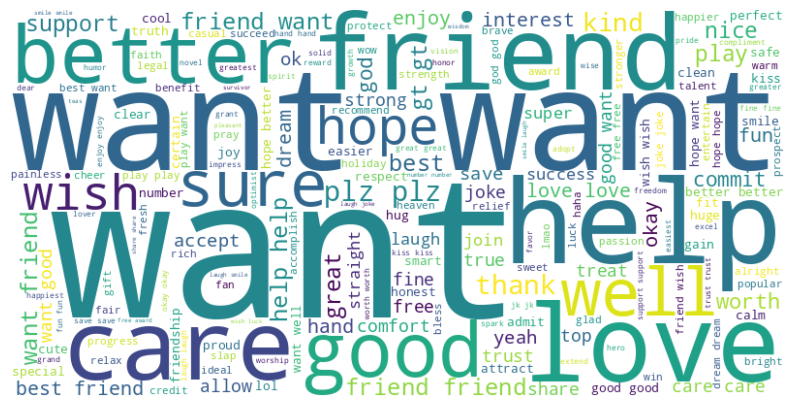

In [ ]:
from wordcloud import WordCloud
wordcloudpos = " ".join(kata_positif)
# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloudpos)

# Menampilkan word cloud menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualisasi Word Cloud Negatif

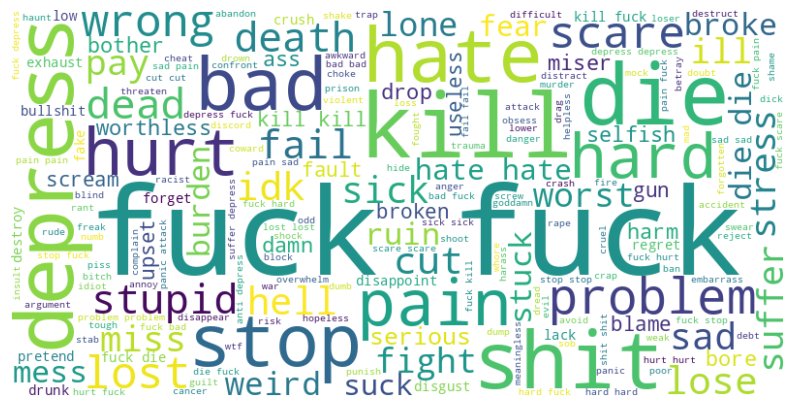

In [ ]:
from wordcloud import WordCloud
wordcloudneg = " ".join(kata_negatif)
# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloudneg)

# Menampilkan word cloud menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
# membuat object untuk membuat column purcashed / label menjadi bernilai numerik
le = LabelEncoder()
# replace nilai dengan yang baru
classLe = le.fit_transform(re_dataset['class'])

# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# fit mengambil data transform mengubah variable x
listtt = re_dataset['cleaned text 2'].apply(lambda x: ', '.join(x))
x = listtt.values
x = cv.fit_transform(x).toarray()
y = re_dataset['class']

In [ ]:
listtt

0       ex wife threaten suiciderec left wife good che...
1       weird get affect compliment come someon know i...
2       final almost never hear bad year ever swear fu...
3                          need helpjust help im cri hard
4       losthello name adam struggl year afraid past y...
                              ...                        
9995    help plz got first reward aka gold say prenuim...
9996      anyon wanna chat im bit bore right hit via chat
9997                    bridgei want die right see option
9998      seriou dad turn gay anyon want earn money heheh
9999    uhh idk work feel like shit piec shit everyth ...
Name: cleaned text 2, Length: 10000, dtype: object

In [ ]:
len(x[0])

18274

# Split Dataset Training & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Training Naive Bayes on the Training Set

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [66]:
y_pred = classifier.predict(x_test)

y_test_array = y_test.to_numpy().reshape(len(y_test))
concatenated_array = np.column_stack((y_pred, y_test_array))

print(concatenated_array)

[['suicide' 'suicide']
 ['non-suicide' 'non-suicide']
 ['suicide' 'suicide']
 ...
 ['non-suicide' 'suicide']
 ['non-suicide' 'non-suicide']
 ['non-suicide' 'non-suicide']]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_array, y_pred)
print(cm)
accuracy_score(y_test_array, y_pred)

[[784 192]
 [ 48 976]]


0.88